In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
df['MEDV']=boston_dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df.to_csv('./datahousing.csv')

In [6]:
# que columnas tiene la base?
df.columns.to_list()

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [7]:
df.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


array([[<AxesSubplot: title={'center': 'RM'}>]], dtype=object)

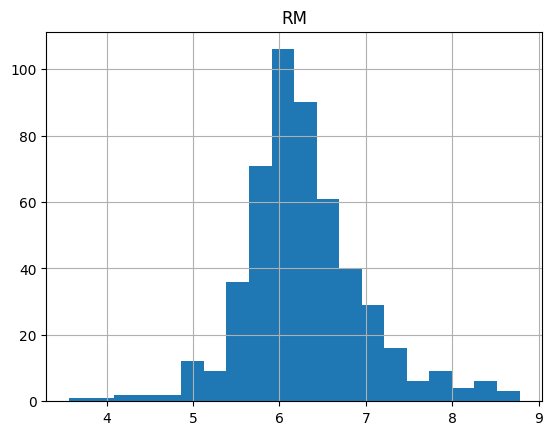

In [8]:
df.hist('RM', bins=20)

In [9]:
# CORRELATION 
corr_matrix = df.corr().round(2)
corr_matrix.style.background_gradient(cmap='Blues')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200000,0.410000,-0.060000,0.420000,-0.220000,0.350000,-0.380000,0.630000,0.580000,0.290000,-0.390000,0.460000,-0.390000
ZN,-0.200000,1.000000,-0.530000,-0.040000,-0.520000,0.310000,-0.570000,0.660000,-0.310000,-0.310000,-0.390000,0.180000,-0.410000,0.360000
INDUS,0.410000,-0.530000,1.000000,0.060000,0.760000,-0.390000,0.640000,-0.710000,0.600000,0.720000,0.380000,-0.360000,0.600000,-0.480000
CHAS,-0.060000,-0.040000,0.060000,1.000000,0.090000,0.090000,0.090000,-0.100000,-0.010000,-0.040000,-0.120000,0.050000,-0.050000,0.180000
NOX,0.420000,-0.520000,0.760000,0.090000,1.000000,-0.300000,0.730000,-0.770000,0.610000,0.670000,0.190000,-0.380000,0.590000,-0.430000
RM,-0.220000,0.310000,-0.390000,0.090000,-0.300000,1.000000,-0.240000,0.210000,-0.210000,-0.290000,-0.360000,0.130000,-0.610000,0.700000
AGE,0.350000,-0.570000,0.640000,0.090000,0.730000,-0.240000,1.000000,-0.750000,0.460000,0.510000,0.260000,-0.270000,0.600000,-0.380000
DIS,-0.380000,0.660000,-0.710000,-0.100000,-0.770000,0.210000,-0.750000,1.000000,-0.490000,-0.530000,-0.230000,0.290000,-0.500000,0.250000
RAD,0.630000,-0.310000,0.600000,-0.010000,0.610000,-0.210000,0.460000,-0.490000,1.000000,0.910000,0.460000,-0.440000,0.490000,-0.380000
TAX,0.580000,-0.310000,0.720000,-0.040000,0.670000,-0.290000,0.510000,-0.530000,0.910000,1.000000,0.460000,-0.440000,0.540000,-0.470000


c:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='RM', ylabel='MEDV'>

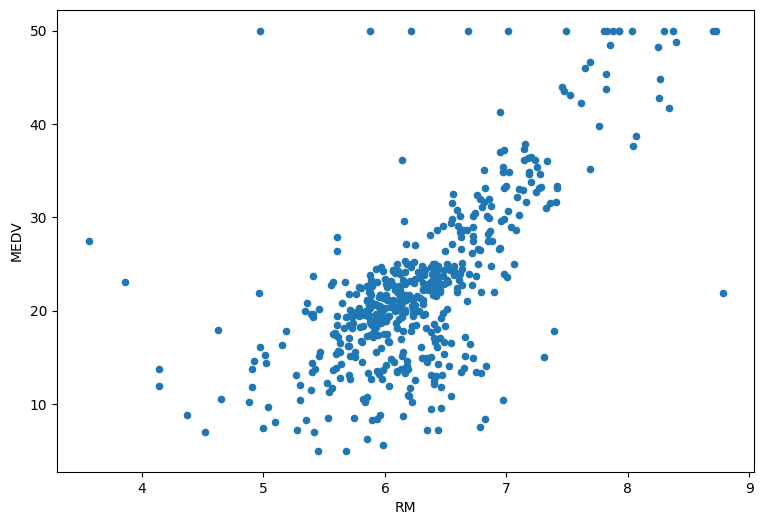

In [10]:
# DATA PREPARATION - FEATURE SELECTION
#Scatter plot is a useful tool to display the relationship between two features
df.plot(
    kind='scatter',
    x = 'RM',
    y = 'MEDV',
    figsize=(9,6)
)

In [11]:
df.ZN.describe()

count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64

c:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='LSTAT', ylabel='MEDV'>

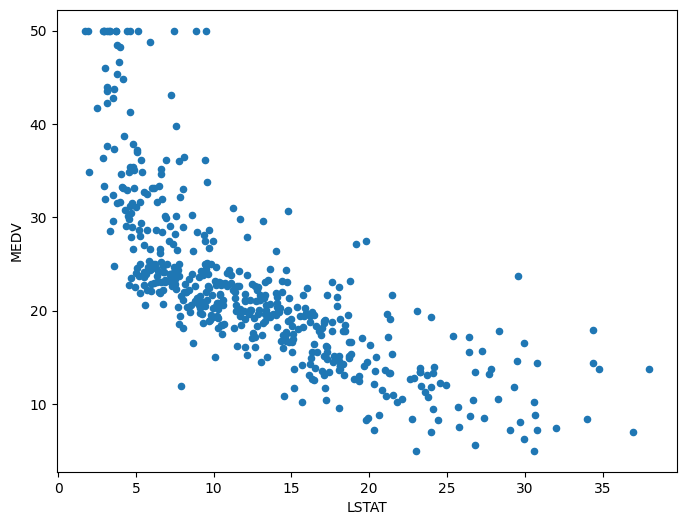

In [12]:
df.plot(kind='scatter',
x='LSTAT',
y='MEDV',
figsize=(8,6)
)

In [13]:
# Establecer las variables para el modelo

X = df[['RM']] # doble bracket para tener un 2-dimensional data
Y = df['MEDV'] # 1 bracket para tener un one-dimensional

In [14]:
# iniciar el modelo (linear regression model)
# instanciar el modelo
model = LinearRegression()
# Separa el modelo en datos de entrenamiento y datos para el test
X_train, X_test, Y_train, Y_test = train_test_split(
    X, 
    Y, 
    test_size=0.3, 
    random_state=42
)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

# ENTRENAR EL MODELO
model.fit(X_train,Y_train)
# UNA VEZ HECHO EL FIT REVISAMOS EL INTERCEPT
intercept = model.intercept_.round(2)
slope = model.coef_.round(2)

print(f"intercept: {intercept}")
print(f"slope: {slope}")

(354, 1)
(354,)
(152, 1)
(152,)
intercept: -34.66
slope: [9.12]


#### Formula del modelo es MEDV = -30.57 + 8.46 * RM
###### MEDV = intercept_ + coef_ * RM

In [15]:
# PREDICTION
# predict() method
# when the averege number of rooms per dwelling is 6.5 the model make the next predict

new_RM = np.array([6.5]).reshape(-1,1) #make sure it's 2d
prediction = model.predict(new_RM) 
print(prediction)

#validation of model
print(intercept + slope * 6.5)


[24.60535684]
[24.62]


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
y_test_predicted = model.predict(X_test)
y_test_predicted.shape

(152,)

In [17]:
# Residual (difference between the observed value of the target and the predicted value)
residuals = Y_test - y_test_predicted
# Evaluacion con Mean Squared Error (MSE)
residuals.mean()
print(f"MSE: {round((residuals**2).mean(),2)}")

# We can also use the mean_squared_error() method under scikit-learn metrics module to output the same result

mse = mean_squared_error(Y_test, y_test_predicted)
print(f"MSE scikit-learn: {round(mse,2)}")

#In general, the smaller the MSE, the better, yet there is no absolute good or bad threshold. We can define it based on the dependent variable, i.e., MEDV in the test set Y_test ranges from 6.3 to 50 
# with a variance 92.26. Compared to the total variance, a MSE of 36.52 is not bad.

MSE: 40.35
MSE scikit-learn: 40.35


In [18]:
# Evaluacion con R-squared
# r-squared is calculated via model.score()
model.score(X_test,Y_test)

0.45846499343030667

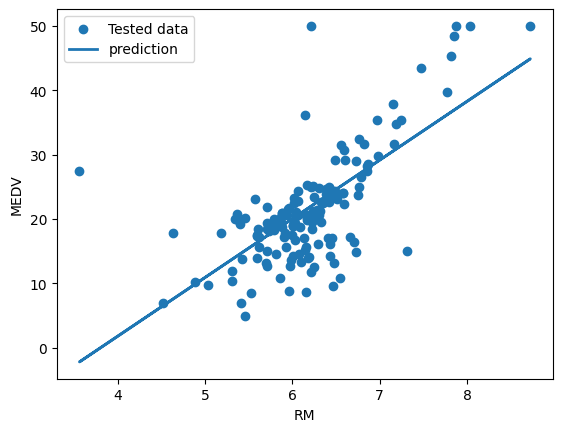

In [19]:
# Evaluamos el modelo haciendo una comparacion visual del modelo fitted y la observacion del set Test
plt.scatter(
    X_test,
    Y_test,
    label='Tested data'
)

plt.plot(
    X_test,
    y_test_predicted,
    label='prediction',
    linewidth=2
)

plt.xlabel('RM')
plt.ylabel('MEDV')
plt.legend(loc='upper left')
plt.show()

Text(0, 0.5, 'Residuals')

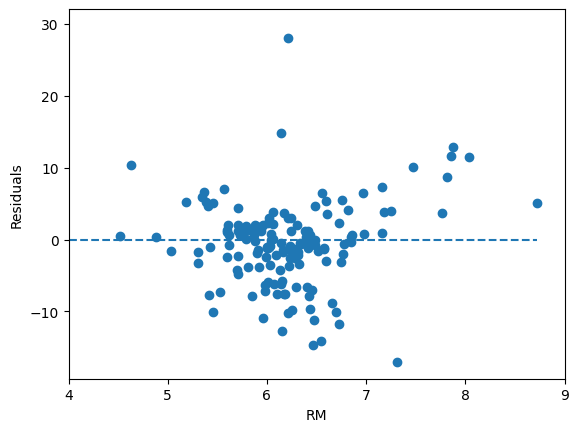

In [20]:
#plot residual
plt.scatter(
    X_test, 
    residuals
    )

#plot a horizontal line at y = 0
plt.hlines(
    y=0,
    xmin=X_test.min(),
    xmax=(X_test.max()),
    linestyles='--'
)
plt.xlim((4,9))
plt.xlabel('RM')
plt.ylabel('Residuals')

### MULTIVARIATE LINEAR REGRESSION

In [21]:
# MEDV = B0 b1 * RM + b2 * LSTAT

# data preparation
X2 = df[['RM', 'LSTAT']]
Y = df['MEDV']

#train test splot
#same randome_state to ensure the same splits
X2_train, X2_test, Y_train, Y_test = train_test_split(
    X2, 
    Y,
    test_size=0.3,
    random_state=1
)

model2 = LinearRegression()
model2.fit(X2_train, Y_train)

print(X2_train.shape)
print(Y_train.shape)
print(X2_test.shape)
print(Y_test.shape)

intercept = model2.intercept_.round(2)
slope = model2.coef_.round(2)

print(intercept)
print(slope)

(354, 2)
(354,)
(152, 2)
(152,)
5.32
[ 4.13 -0.68]


In [22]:
# PREDICTION
# predict() method
# when the averege number of rooms per dwelling is 6.5 the model make the next predict

y2_test_predicted = model2.predict(X2_test)

new_values = np.array([[6.5, 7]])
prediction = model2.predict(new_values) 
print(f"Prediction with the variables: {prediction}")

mse = mean_squared_error(Y_test, y2_test_predicted)
print(f"MSE scikit-learn: {round(mse,2)}")

rsquared = model2.score(X2_test,Y_test)
print(f"R-squared scikit-learn: {round(rsquared,2)}")

Prediction with the variables: [27.39725039]
MSE scikit-learn: 28.93
R-squared scikit-learn: 0.68


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
print(y2_test_predicted.dtype)


float64
